In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import io
import matplotlib.lines as lines

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
filename = "/content/juan.xlsx"
tabla = pd.read_excel( filename)
tabla.head()

,Peso,Talla,Tiempo de Gestación,Número de Consultas Prenatales,APGAR1,Edad de la Madre,Edad del Padre,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,3.615,51,42,9,9.0,18,26,NaN,0.620321,NaN,1,NaN
1,3.860,53,42,4,10.0,19,22,NaN,NaN,NaN,NaN,NaN
2,3.450,49,41,9,9.0,20,27,NaN,NaN,NaN,NaN,NaN
3,3.600,51,41,8,8.0,19,20,NaN,NaN,NaN,NaN,NaN
4,3.780,51,41,8,9.0,23,22,NaN,NaN,NaN,NaN,NaN


In [ ]:
tabla = tabla[["Edad de la Madre",
               "Tiempo de Gestación",
               "Peso"]]
Y= tabla.Peso
X= tabla.drop(['Peso'], axis=1)
X.head()

,Edad de la Madre,Tiempo de Gestación
0,18,42
1,19,42
2,20,41
3,19,41
4,23,41


In [ ]:
print(np.linspace(10,-2,100)[:10])
lambdas = 10**np.linspace(10,-2,100)*0.5
# print(lambdas[:10])
# print(lambdas[-10:])

[10.          9.87878788  9.75757576  9.63636364  9.51515152  9.39393939
  9.27272727  9.15151515  9.03030303  8.90909091]


In [ ]:
sin_atipicos = tabla[(tabla["Peso"] < 6000) & (tabla["Tiempo de Gestación"] < 80)]
sin_atipicos.head()


,Edad de la Madre,Tiempo de Gestación,Peso
0,18,42,3.615
1,19,42,3.860
2,20,41,3.450
3,19,41,3.600
4,23,41,3.780


In [ ]:
tabla1 = pd.concat([sin_atipicos["Peso"], sin_atipicos["Tiempo de Gestación"],  sin_atipicos["Edad de la Madre"]], axis = 1)
tabla1.head()

,Peso,Tiempo de Gestación,Edad de la Madre
0,3.615,42,18
1,3.860,42,19
2,3.450,41,20
3,3.600,41,19
4,3.780,41,23


In [ ]:
from sklearn.model_selection import train_test_split # Acá vamos a seleccionar los datos de entrenamiento y de prueba
x_train, x_test, y_train, y_test, z_train, z_test= train_test_split(tabla1["Peso"], tabla1["Tiempo de Gestación"], tabla1["Edad de la Madre"], test_size = 0.3)
 # Escogemos el 30% de los datos para prueba


In [ ]:
print(x_train, y_train, z_train)

772    3.625
153    3.700
258    3.900
307    3.345
554    3.743
       ...  
715    3.500
457    3.600
899    3.800
21     3.325
203    3.799
Name: Peso, Length: 644, dtype: float64 772    38
153    40
258    40
307    39
554    39
       ..
715    38
457    39
899    37
21     40
203    40
Name: Tiempo de Gestación, Length: 644, dtype: int64 772    27
153    19
258    21
307    16
554    22
       ..
715    19
457    34
899    27
21     16
203    30
Name: Edad de la Madre, Length: 644, dtype: int64


In [ ]:
yz_train = pd.concat([y_train, z_train], axis=1)
yz_train

,Tiempo de Gestación,Edad de la Madre
772,38,27
153,40,19
258,40,21
307,39,16
554,39,22
...,...,...
715,38,19
457,39,34
899,37,27
21,40,16


In [ ]:
yz_test = pd.concat([y_test, z_test], axis=1)
yz_test

,Tiempo de Gestación,Edad de la Madre
79,40,27
301,39,31
779,38,25
9,40,21
494,39,24
...,...,...
128,40,22
69,40,25
142,40,30
343,39,23


In [ ]:
from sklearn.linear_model import Ridge, RidgeCV

In [ ]:
pip --version sklearn.linear_model

pip 23.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)


In [ ]:
ridge = Ridge( )
coefs = []

for k in lambdas:
  ridge.set_params(alpha = k )
  ridge.fit(yz_train, x_train)
  coefs.append(ridge.coef_)


print(np.shape(coefs))
coefs[0]


(100, 2)


array([ 5.36541293e-09, -1.03132418e-08])

In [ ]:
print("El intercepto del modelo es: ", ridge.intercept_)
print("Coeficiente:", list(zip(yz_train, ridge.coef_.flatten(), )))

El intercepto del modelo es:  1.9064854880528475
Coeficiente: [('Tiempo de Gestación', 0.04451500149069309), ('Edad de la Madre', -0.0015140068110799255)]


In [ ]:
ridgecv = RidgeCV(alphas = lambdas, scoring = "neg_mean_squared_error")
ridgecv.fit(yz_train, x_train)
print("El valor de lambda encontrado con cross validation es: ", round(ridgecv.alpha_,3))

El valor de lambda encontrado con cross validation es:  21.644


In [ ]:
mod_ridgeCV = Ridge(alpha = ridgecv.alpha_, )
mod_ridgeCV.fit(yz_train, x_train)
print(pd.Series(mod_ridgeCV.coef_, index = X.columns))

Edad de la Madre       0.042942
Tiempo de Gestación   -0.001529
dtype: float64


In [ ]:
x_pred = mod_ridgeCV.predict(yz_test)
x_pred

array([3.64448695, 3.59542758, 3.56166263, 3.65366361, 3.60613367,
       3.60460423, 3.64295751, 3.64754584, 3.52789768, 3.56625096,
       3.52025047, 3.5893098 , 3.65672249, 3.65672249, 3.63836918,
       3.65978138, 3.54177987, 3.64907528, 3.64754584, 3.65213416,
       3.60460423, 3.61531033, 3.66284026, 3.56625096, 3.65366361,
       3.62613364, 3.54483876, 3.66131082, 3.60460423, 3.59848646,
       3.64907528, 3.57236873, 3.55095653, 3.56166263, 3.47272053,
       3.62919252, 3.60613367, 3.50954437, 3.610722  , 3.52177991,
       3.60460423, 3.50801493, 3.65672249, 3.65366361, 3.52636824,
       3.56930984, 3.64754584, 3.60919256, 3.59848646, 3.59389813,
       3.55248597, 3.65825194, 3.55095653, 3.58778036, 3.65060472,
       3.60307479, 3.5677804 , 3.55554486, 3.60613367, 3.49577938,
       3.63836918, 3.65519305, 3.56319207, 3.60613367, 3.55248597,
       3.63072197, 3.61378089, 3.57389817, 3.55860374, 3.61378089,
       3.66436971, 3.65978138, 3.57236873, 3.59389813, 3.63531

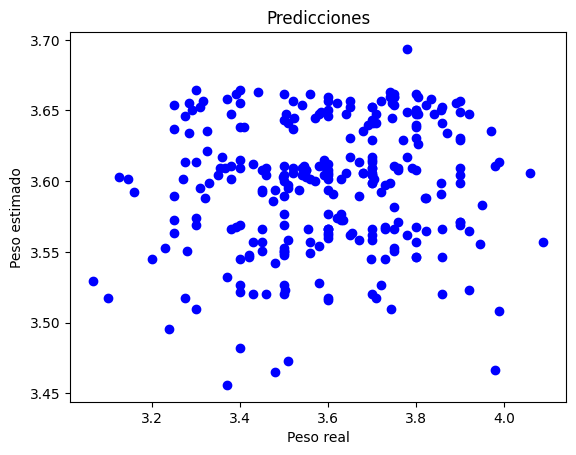

In [ ]:
plt.scatter(x_test, x_pred, color = "blue")
plt.title("Predicciones")
plt.xlabel("Peso real")
plt.ylabel("Peso estimado")
plt.show()

In [ ]:
ECMcv = round(mean_squared_error(x_test, x_pred),3)
print(ECMcv)

0.04


In [ ]:
print("ECM con lambda es:", ECMcv)

ECM con lambda es: 0.04


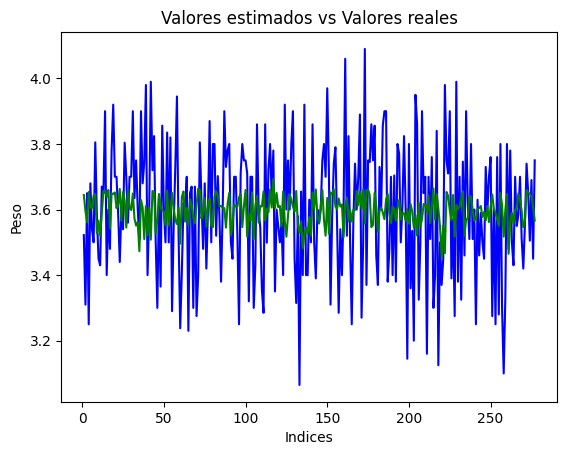

In [ ]:
eje_X = range(1,len(x_test)+1)
plt.plot(eje_X, x_test, color = "blue")
plt.plot(eje_X, x_pred, color = "green")
plt.title("Valores estimados vs Valores reales")
plt.xlabel("Indices")
plt.ylabel("Peso")
plt.show()

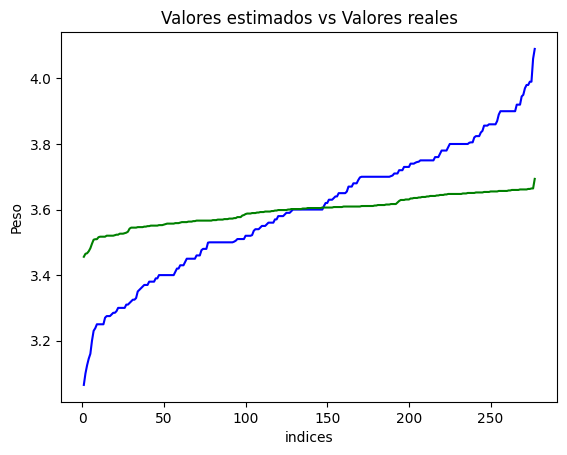

In [ ]:
eje_X = range(1, len(x_test)+1)
plt.plot(eje_X, sorted(x_test), color = "blue")
plt.plot(eje_X, sorted(x_pred), color = "green")
plt.title("Valores estimados vs Valores reales")
plt.xlabel("indices")
plt.ylabel("Peso")
plt.show()

In [ ]:
err_abs = x_test-x_pred
err_cuad = pow(err_abs, 2)
print("ECM con lambda = ", round(ridgecv.alpha_, 3), "es:", ECMcv)

ECM con lambda =  21.644 es: 0.04


In [ ]:
r_cuadrada = r2_score(x_test, x_pred)
print("R^2 = ", round(r_cuadrada,3))

n = len(yz_train)
p = len(x_train)
r_cuad_aj =1 - (((1- r_cuadrada)*(n-1))/(n-p-1))

print("n = ",n)
print("p =",p)
print("R^2 =", round(r_cuad_aj,3)) #porcentaje de variabilidad utilizamos la r^2 ajustada

R^2 =  0.006
n =  644
p = 644
R^2 = 639.971


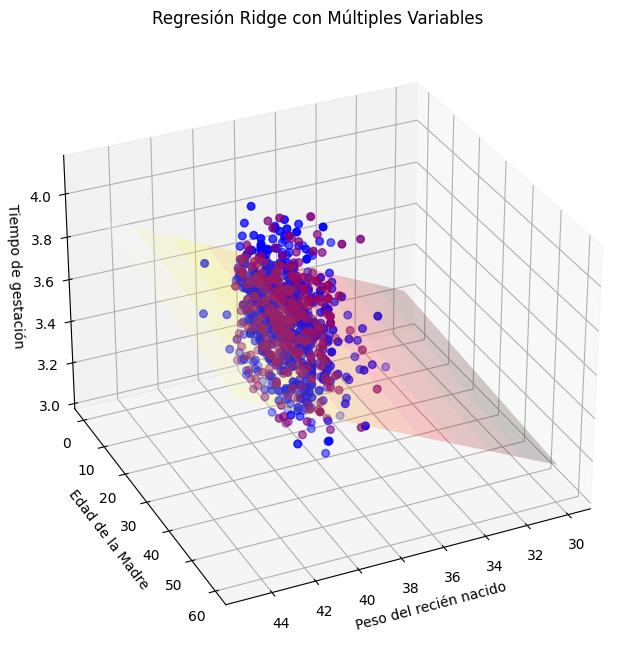

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sb
import matplotlib.pyplot as plt

fig = plt.figure(figsize=((10,8)))
ax = fig.add_subplot(projection='3d')
xx, yy = np.meshgrid(np.linspace(30, 45, num=10), np.linspace(0, 60, num=10))
n = list(zip(yz_train, ridge.coef_.flatten(), ))

nuevoX = (n[0][1] * xx)
nuevoY = (n[1][1] * yy)


x = (nuevoX + nuevoY + ridge.intercept_)
ax.plot_surface(xx, yy, x, alpha=0.2, cmap='hot')
ax.scatter(yz_train["Tiempo de Gestación"], yz_train["Edad de la Madre"], x_train, c='blue',s=30)
ax.scatter(yz_test["Tiempo de Gestación"], yz_test["Edad de la Madre"], x_test, c='purple',s=30)
ax.view_init(elev=30., azim=65)

ax.set_xlabel('Peso del recién nacido')
ax.set_ylabel('Edad de la Madre')
ax.set_zlabel('Tiempo de gestación')
ax.set_title('Regresión Ridge con Múltiples Variables')

plt.show()

In [ ]:
import plotly.express as px

xx, yy = np.meshgrid(np.linspace(18, 45, num=100), np.linspace(0, 60, num=100))
n = list(zip(yz_train, ridge.coef_.flatten(), ))

nuevoX = (n[0][1] * xx)
nuevoY = (n[1][1] * yy)


x = (nuevoX + nuevoY + ridge.intercept_)


# x = np.linspace(-10, 10, 100)
# y = np.linspace(-10, 10, 100)
# X,Y = np.meshgrid(x,y)
df_train = pd.DataFrame()
df_test = pd.DataFrame()

df_train["Tiempo de Gestación"] = yz_train["Tiempo de Gestación"]
df_train["Edad de la Madre"] = yz_train["Edad de la Madre"]
df_train["Peso"] = x_train
df_train["tipo de dato"] = [ "train" for i in range(len(df_train))]

df_test["Tiempo de Gestación"] = yz_test["Tiempo de Gestación"]
df_test["Edad de la Madre"] = yz_test["Edad de la Madre"]
df_test["Peso"] = x_test
df_test["tipo de dato"] = [ "test" for i in range(len(df_test))]

df = pd.concat([df_train,df_test], axis = 0)
df["tamaño"] = [ 0.2 for i in range(len(df))]
# Crear la figura tridimensional
fig = px.scatter_3d(df,
                    x = "Tiempo de Gestación",
                    y = "Edad de la Madre",
                    z="Peso",
                    opacity = 0.5,
                    size="tamaño",
                    color = "tipo de dato")

# fig.scatter_3d(x=xx.flatten(), y=yy.flatten(), z=x.flatten(), opacity=0.02)

fig.show()
df

,Tiempo de Gestación,Edad de la Madre,Peso,tipo de dato,tamaño
772,38,27,3.625,train,0.2
153,40,19,3.700,train,0.2
258,40,21,3.900,train,0.2
307,39,16,3.345,train,0.2
554,39,22,3.743,train,0.2
...,...,...,...,...,...
128,40,22,3.650,test,0.2
69,40,25,3.505,test,0.2
142,40,30,3.690,test,0.2
343,39,23,3.450,test,0.2


In [ ]:
yz_test = pd.concat([y_test, z_test], axis=1)
r2 = ridge.score(yz_test, x_test)
r2

0.004884712888931664